## Modeling a predictor for the dataset to try to determine whether a patient could develop diabetes

In [23]:
import numpy as np
import pandas as pd
# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [17]:
# Loading Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# df.isnull().sum()

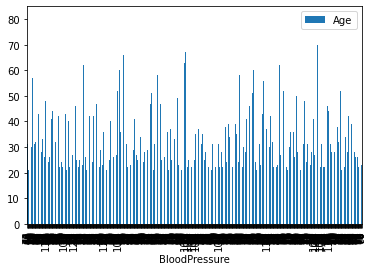

In [19]:
df.plot(x='BloodPressure', y='Age', kind='bar')
plt.show()

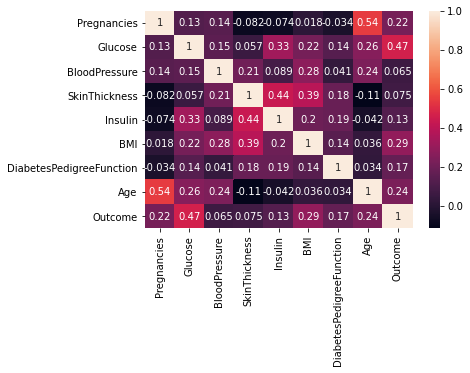

In [20]:
sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Patient Records')

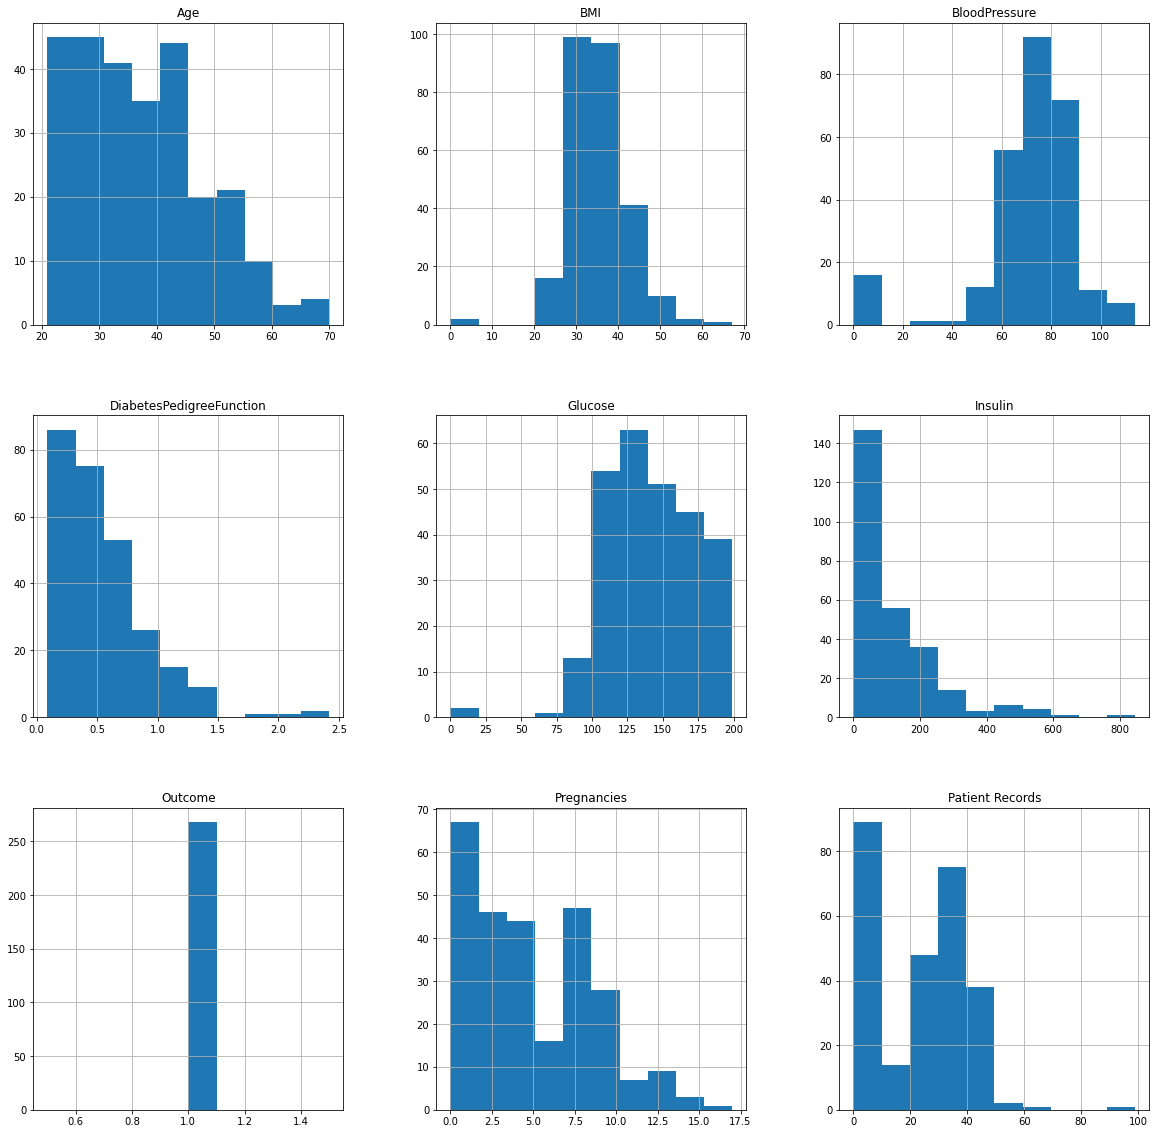

In [21]:
p = df[df['Outcome']==1].hist(figsize = (20,20))
plt.title('Patient Records')

In [22]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [48]:
clf = RandomForestClassifier(criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1,
            min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


RandomForestClassifier(n_estimators=150, n_jobs=1, verbose=1)

In [49]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [50]:
print("AUC: %.3f" % roc_auc_score(y_test, y_pred_proba.T[1]))


AUC: 0.830


In [51]:
confusion_matrix(y_test, y_pred)


array([[109,  11],
       [ 27,  45]], dtype=int64)

In [52]:
recall_score(y_test, y_pred, pos_label=1) 


0.625